In [1]:
%matplotlib inline

In [7]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2,linewidth=75)

In [3]:
t_c = [0.5,14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [4]:
n_samples= t_u.shape[0]
n_val = int(0.2*n_samples)

shuffled_indeces = torch.randperm(n_samples)

train_indices = shuffled_indeces[0:-n_val]
val_indices = shuffled_indeces[-n_val:]

train_indices,val_indices

(tensor([ 2,  7,  1,  8,  6,  5,  0, 10,  3]), tensor([9, 4]))

In [5]:
t_u_train = t_u[train_indices]#用张量索引直接获取新的张量
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1*t_u_train
t_un_val = 0.1*t_u_val

In [10]:
def train_loop(n_epochs, optimizer, model, loss_fn, t_u_train,t_u_val,t_c_train,t_c_val):
    for eopch in range(1,n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train,t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val,t_c_val)

        optimizer.zero_grad() #清空梯度
        loss_train.backward() #对设置了 requires_grad = True的参数进行梯度更新，这里是optimizer接收的模型参数如optim.SGD(seq_model.parameters(),lr=1e-4)
        #.backward() 将得到的梯度信息存储在目标对象的 .grad中，这里是 optimizer.grad
        optimizer.step() #利用optimizer.grad属性中的 梯度信息对参数进行一次更新

        if eopch == 1 or eopch % 100 == 0 :
            print(f"Epoch{eopch},Training loss {loss_train.item():.4f},"
                  f"Validation loss {loss_val.item():.4f}")

In [8]:
def loss_fn(t_p,t_c):
    squared_diffs = (t_p -t_c) **2
    return squared_diffs.mean()

Epoch1,Training loss 190.4080,Validation loss 136.7202
Epoch100,Training loss 137.5161,Validation loss 75.3121
Epoch200,Training loss 108.9026,Validation loss 41.0545
Epoch300,Training loss 93.6897,Validation loss 22.6053
Epoch400,Training loss 85.3708,Validation loss 12.8495
Epoch500,Training loss 80.3699,Validation loss 7.7769
Epoch600,Training loss 76.8006,Validation loss 5.1207
Epoch700,Training loss 73.8019,Validation loss 3.6580
Epoch800,Training loss 70.9587,Validation loss 2.7741
Epoch900,Training loss 68.0511,Validation loss 2.2107
Epoch1000,Training loss 65.2379,Validation loss 1.8570
Epoch1100,Training loss 62.8178,Validation loss 1.5505
Epoch1200,Training loss 60.5977,Validation loss 1.2557
Epoch1300,Training loss 58.4455,Validation loss 1.0184
Epoch1400,Training loss 56.3264,Validation loss 0.8369
Epoch1500,Training loss 54.2237,Validation loss 0.6998
Epoch1600,Training loss 52.1269,Validation loss 0.5990
Epoch1700,Training loss 50.0293,Validation loss 0.5293
Epoch1800,Tra

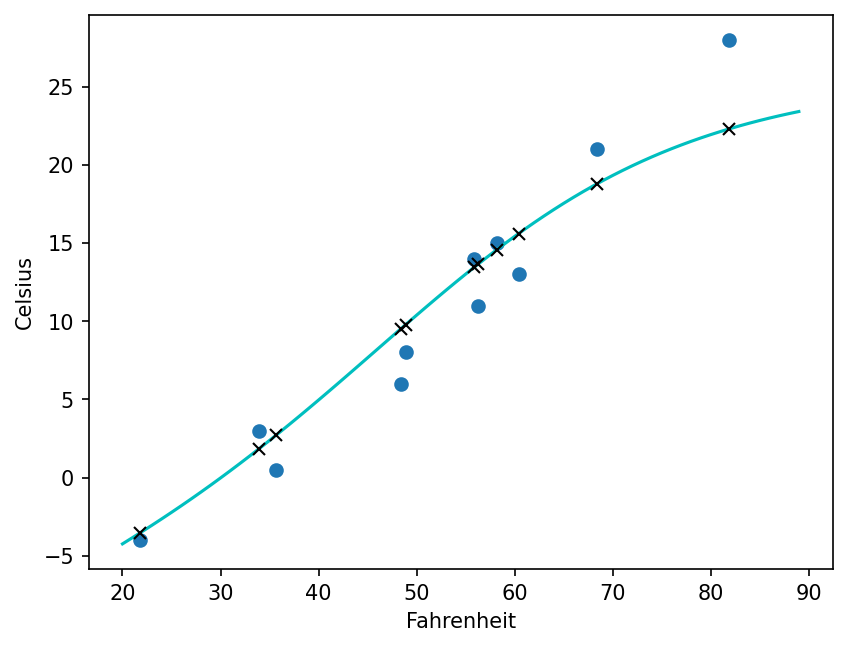

In [11]:
from collections import OrderedDict
# OrderedDict 能记住每个元素添加的顺序，这里即使网络层的顺序

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear',nn.Linear(1,neuron_count)),
    ('hidden_activation',nn.Tanh()),
    ('output_linear',nn.Linear(neuron_count,1))
]))

optimizer = optim.SGD(seq_model.parameters(),lr=1e-4)

train_loop(n_epochs=5000,
           optimizer=optimizer,
           model=seq_model,
           loss_fn=nn.MSELoss(),
           t_u_train=t_un_train,
           t_u_val=t_un_val,
           t_c_train=t_c_train,
           t_c_val=t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20.,90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(),t_c.numpy(),'o')
plt.plot(t_range.numpy(),seq_model(0.1*t_range).detach().numpy(),'c-')
plt.plot(t_u.numpy(),seq_model(0.1*t_u).detach().numpy(),'kx')

In [13]:
t_range.shape

torch.Size([70, 1])